In [1]:
import random
import string

def create_empty_hash_table():
    """Creates hashtable with 26 empty buckets"""
    return [[] for x in range(26)]

def hashfunc(key):
    """Takes a key as an input and returns the appropriate index"""
    wordtoindex = {"a": 0, "b": 1, "c": 2, "d": 3, "e": 4, "f": 5, "g": 6, "h": 7, "i": 8, "j": 9,
                  "k": 10 , "l": 11, "m": 12, "n": 13, "o": 14, "p": 15, "q": 16, "r": 17, "s": 18,
                   "t": 19, "u": 20, "v": 21, "w": 22, "x": 23, "y":24, "z":25}
    #or we can use ord(c[0])-ord('a')
    return wordtoindex[key[0].lower()]

def htable_put(table, key, value):
    """Inserts (name, age) tuple in appropriate buckets"""
    bucket = table[hashfunc(key)]
    bucket.append((key, value))

def populate_hashtable(table, name_age_list):
    """Iterates through a list of (name, age) tuples and places them in appropriate buckets"""
    for name, age in name_age_list:
        htable_put(table, name, age)
    return table
    
def htable_search(table, key):
    """Searches a specific bucket in the hashtable and returns (name, age) tuple"""
    bucket = table[hashfunc(key)]
    return linear_search(bucket, key)

def linear_search(name_list, key):
    """Basic linear search which searches a list of names and returns (name, age) tuple"""
    for name, age in name_list:
        if name == key:
            return (name, age)
        
def read_names():
    """Reads names from names.txt and returns a list of (name, age) tuple"""
    with open('names.txt') as f:
        names = f.read().split('\n')
    return [(name, random.randint(1, 100)) for name in names]

In [6]:
name_age_list = read_names()
name_to_search = name_age_list[-random.randint(1,99)][0]
name_to_search

'Halle'

In [3]:
%%time 
tym = [linear_search(name_age_list, name_to_search) for i in range(50000)]

CPU times: user 1.69 s, sys: 11 ms, total: 1.7 s
Wall time: 1.7 s


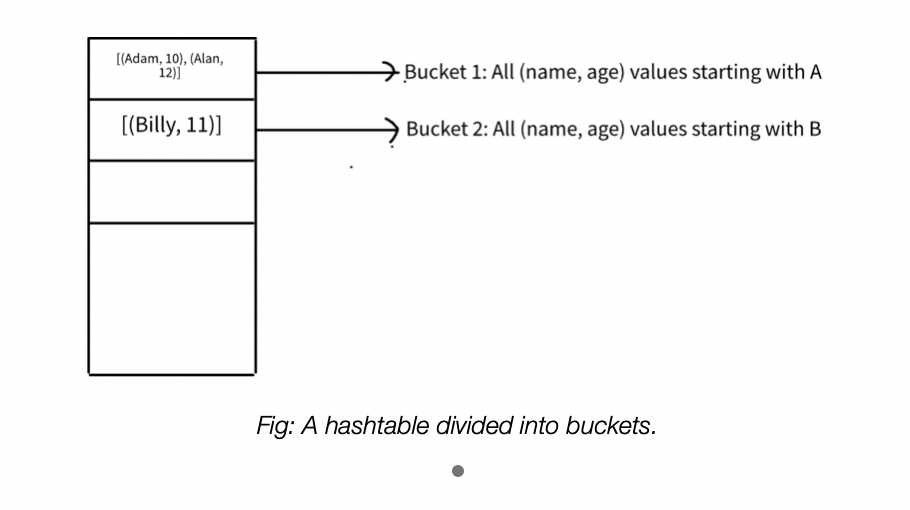

In [4]:
table = create_empty_hash_table()
table = populate_hashtable(table, name_age_list)

In [5]:
%%time 
tym2= [htable_search(table, name_to_search) for i in range(50000)]

CPU times: user 135 ms, sys: 3.93 ms, total: 138 ms
Wall time: 137 ms
